# Aula 8 - visualizando campos 2D + aplicações python na oceanografia

**Visualização de campos escalares**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

In [31]:
# leitura do arquivo
ds = xr.open_dataset('/home/danilo/DATA/Mercator/merc2014.nc')
# inspeção inicial
ds

<xarray.Dataset>
Dimensions:      (depth: 31, latitude: 41, longitude: 49, time: 366)
Coordinates:
  * longitude    (longitude) float32 -50.0 -49.75 -49.5 ... -38.5 -38.25 -38.0
  * latitude     (latitude) float32 -30.0 -29.75 -29.5 ... -20.5 -20.25 -20.0
  * depth        (depth) float32 0.50576 1.555855 2.667682 ... 180.5499 199.79
  * time         (time) datetime64[ns] 2014-01-01T12:00:00 ... 2015-01-01T12:...
Data variables:
    salinity     (time, depth, latitude, longitude) float32 ...
    u            (time, depth, latitude, longitude) float32 ...
    v            (time, depth, latitude, longitude) float32 ...
    temperature  (time, depth, latitude, longitude) float32 ...
    mlp          (time, latitude, longitude) float32 ...
    ssh          (time, latitude, longitude) float32 ...
    bottomT      (time, latitude, longitude) float32 ...
Attributes:
    CDI:                 Climate Data Interface version 1.8.1 (http://mpimet....
    Conventions:         CF-1.4
    history:             2016/08/23 12:37:28 MERCATOR OCEAN Netcdf creation
    source:              MERCATOR GLORYS2V4
    institution:         MERCATOR OCEAN
    title:               daily mean from GLORYS2V4
    easting:             longitude
    northing:            latitude
    references:          http://www.mercator-ocean.fr
    comment:             CMEMS product
    domain_name:         GL4
    field_type:          mean
    field_date:          2015-12-28 00:00:00
    field_julian_date:   24102.0
    julian_day_unit:     days since 1950-01-01 00:00:00
    forecast_range:      5-day_forecast
    forecast_type:       nowcast
    bulletin_date:       2015-12-30 00:00:00
    bulletin_type:       operational
    longitude_min:       -180.0
    longitude_max:       179.75
    latitude_min:        -80.0
    latitude_max:        90.0
    z_min:               0.50576
    z_max:               5902.058
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  -30.0
    geospatial_lat_max:  -20.0
    geospatial_lon_min:  -50.0
    geospatial_lon_max:  -38.0
    CDO:                 Climate Data Operators version 1.8.1 (http://mpimet....

Precisamos modificar, de forma coerente, a unidade da nossa temperatura:

In [14]:
ds['temperature'] -= 273.15
ds['temperature'].attrs['units'] = 'degC'
ds['temperature'].attrs['unit_long'] = 'Celsius degrees'
ds

<xarray.Dataset>
Dimensions:      (depth: 31, latitude: 41, longitude: 49, time: 366)
Coordinates:
  * longitude    (longitude) float32 -50.0 -49.75 -49.5 ... -38.5 -38.25 -38.0
  * latitude     (latitude) float32 -30.0 -29.75 -29.5 ... -20.5 -20.25 -20.0
  * depth        (depth) float32 0.50576 1.555855 2.667682 ... 180.5499 199.79
  * time         (time) datetime64[ns] 2014-01-01T12:00:00 ... 2015-01-01T12:...
Data variables:
    salinity     (time, depth, latitude, longitude) float32 ...
    u            (time, depth, latitude, longitude) float32 ...
    v            (time, depth, latitude, longitude) float32 ...
    temperature  (time, depth, latitude, longitude) float32 26.335114 ... 16....
    mlp          (time, latitude, longitude) float32 ...
    ssh          (time, latitude, longitude) float32 ...
    bottomT      (time, latitude, longitude) float32 ...
Attributes:
    CDI:                 Climate Data Interface version 1.8.1 (http://mpimet....
    Conventions:         CF-1.4
    history:             2016/08/23 12:37:28 MERCATOR OCEAN Netcdf creation
    source:              MERCATOR GLORYS2V4
    institution:         MERCATOR OCEAN
    title:               daily mean from GLORYS2V4
    easting:             longitude
    northing:            latitude
    references:          http://www.mercator-ocean.fr
    comment:             CMEMS product
    domain_name:         GL4
    field_type:          mean
    field_date:          2015-12-28 00:00:00
    field_julian_date:   24102.0
    julian_day_unit:     days since 1950-01-01 00:00:00
    forecast_range:      5-day_forecast
    forecast_type:       nowcast
    bulletin_date:       2015-12-30 00:00:00
    bulletin_type:       operational
    longitude_min:       -180.0
    longitude_max:       179.75
    latitude_min:        -80.0
    latitude_max:        90.0
    z_min:               0.50576
    z_max:               5902.058
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  -30.0
    geospatial_lat_max:  -20.0
    geospatial_lon_min:  -50.0
    geospatial_lon_max:  -38.0
    CDO:                 Climate Data Operators version 1.8.1 (http://mpimet....

Vamos, inicialmente, plotar o campo de temperatura da superfície do mar usando o matplotlib + cartopy:
- pcolormesh
- contourf

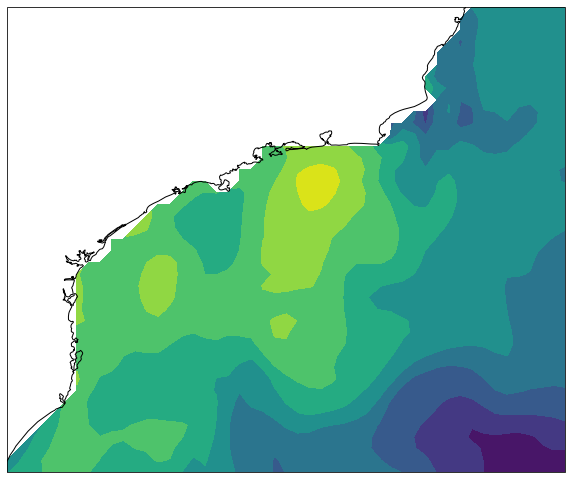

In [16]:
# extrair informação
lon,lat = ds.longitude.values, ds.latitude.values
sst = ds.isel(time=0, depth=0).temperature.values

fig,ax = plt.subplots(figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines('10m')

# ax.pcolormesh(lon, lat, sst)
ax.contourf(lon, lat, sst)

E com resolução maior?

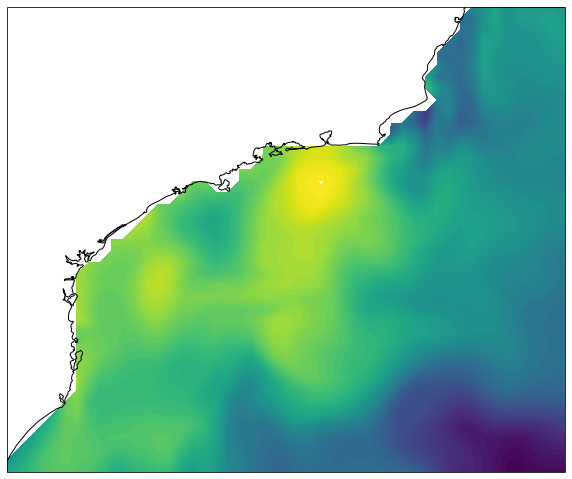

In [21]:
# visualização do campo de elevação da superfície livre do mar - matplotlib.contourf
resolucao = np.arange(np.nanmin(sst), np.nanmax(sst), 0.1)
fig,ax = plt.subplots(figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines('10m')
ax.contourf(lon, lat, sst, resolucao)

Vamos, agora, refazer as mesmas figuras acima, mas utilizando o xarray + cartopy:

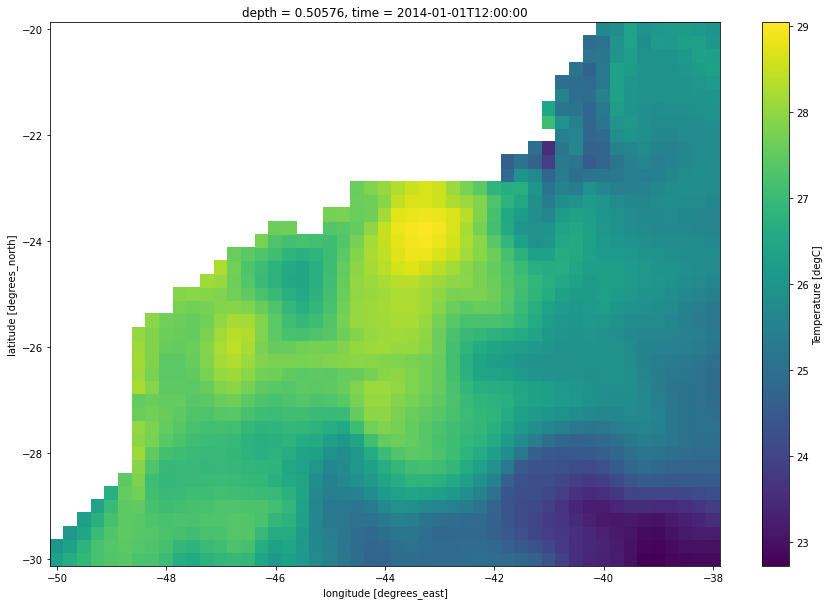

In [24]:
ds.isel(time=0, depth=0).temperature.plot.pcolormesh(figsize=(15,10))

Que tal compararmos os dois métodos?

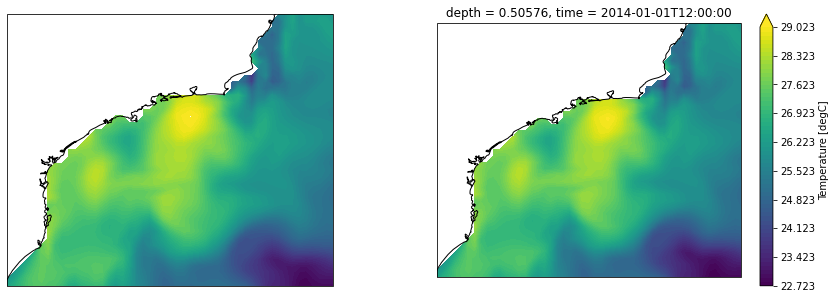

In [27]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# matplotlib.pcolormesh
lon,lat = ds.longitude.values, ds.latitude.values
sst = ds.isel(time=0, depth=0).temperature.values
axes[0].contourf(lon, lat, sst, resolucao)

# xarray.plot.pcolormesh
ds.isel(time=0, depth=0).temperature.plot.contourf(ax=axes[1], levels=resolucao)

_ = [ax.coastlines('10m') for ax in axes]

Da mesma forma que o pcolormesh/contourf, podemos plotar campos **vetoriais** utilizando o matplotlib+cartopy ou xarray+cartopy. Vejamos:

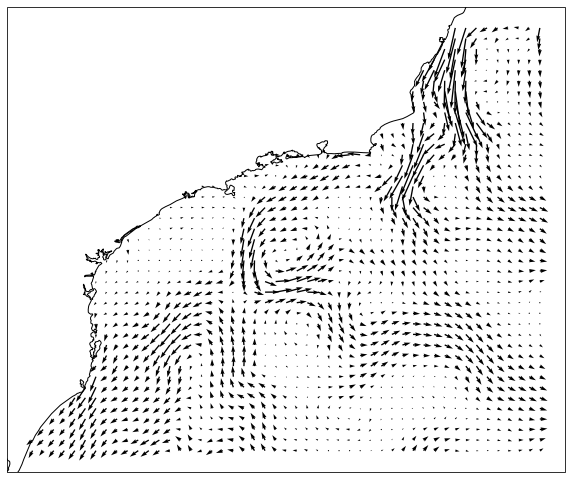

In [32]:
lon,lat = ds.longitude.values, ds.latitude.values
u,v = ds.isel(time=0, depth=0).u.values, ds.isel(time=0, depth=0).v.values
fig,ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines('10m')
ax.quiver(lon, lat, u, v)

Que tal acrescentar cores?

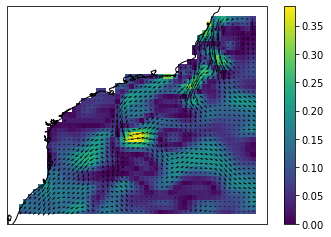

In [33]:
lon,lat = ds.longitude.values, ds.latitude.values
u,v = ds.isel(time=0, depth=0).u.values, ds.isel(time=0, depth=0).v.values
spd = np.sqrt(u**2, v**2)

fig,ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines('10m')
cp = ax.pcolormesh(lon, lat, spd)
ax.quiver(lon, lat, u, v)
plt.colorbar(cp)

plt.savefig('lec08_quiver_pcolormesh.png', dpi=150, bbox_to_inches='tight')

E como podemos plotar dados de batimetria de conjuntos globais (etopo, gebco)?

In [ ]:
# se estiver no google colab, rode:
!wget --directory-prefix=../dados/ https://github.com/nilodna/python-basico/raw/feature_iojr-shortcourse/dados/etopo1.nc

In [28]:
ds = xr.open_dataset('../dados/etopo1.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 842, lon: 1034)
Coordinates:
  * lat      (lat) float64 -31.5 -31.48 -31.47 -31.45 ... -17.52 -17.5 -17.48
  * lon      (lon) float64 -52.2 -52.18 -52.17 -52.15 ... -35.02 -35.0 -34.98
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_TIFFTAG_RESOLUTIONUNIT:  2
    GDAL_TIFFTAG_XRESOLUTION:     72.0
    GDAL_TIFFTAG_YRESOLUTION:     72.0
    Conventions:                  CF-1.5
    GDAL:                         GDAL 2.1.2, released 2016/10/24
    history:                      Fri Apr 03 12:21:40 2020: GDAL CreateCopy( ...

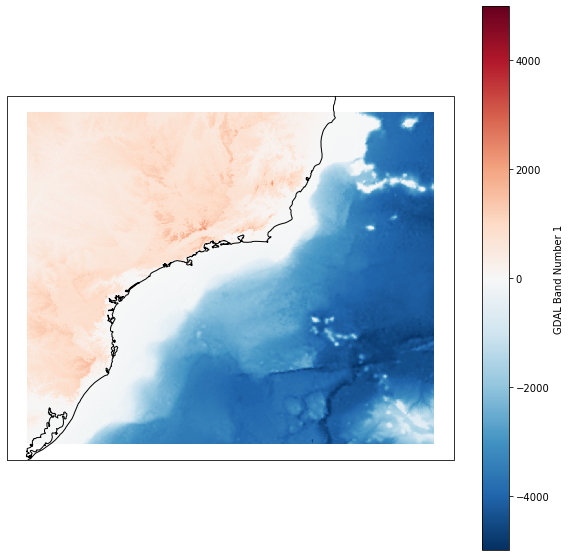

In [29]:
fig,ax = plt.subplots(figsize=(10,10), 
                      subplot_kw={'projection': ccrs.PlateCarree()})
_= ds['Band1'].plot.pcolormesh(ax=ax)

ax.coastlines('10m')

**[cmocean](https://matplotlib.org/cmocean/)**

Thyng, K. M., Greene, C. A., Hetland, R. D., Zimmerle, H. M., & DiMarco, S. F. (2016). True colors of oceanography. Oceanography, 29(3), 10. [[link]](http://tos.org/oceanography/assets/docs/29-3_thyng.pdf)

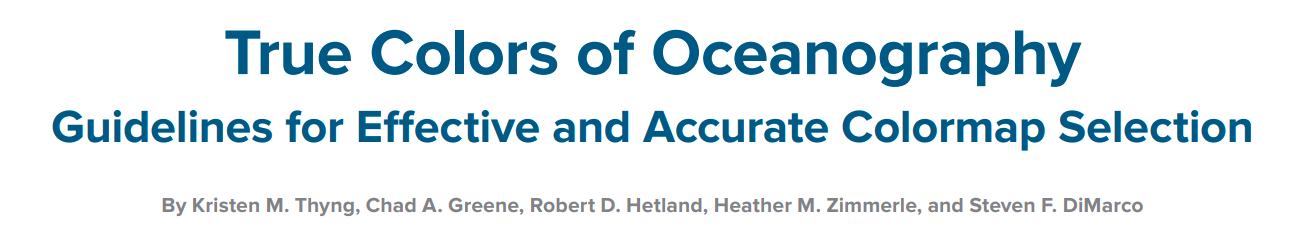


**Por que?**

- gráficos e figuras são a forma como comunicamos a ciência
- ilustrações devem transmitir a ideia correta
- cores atuam com grande peso na transmissão dessa ideia
- daltônicos


**Como usar?**

```python
pip install cmocean
```

```python
conda install -c conda-forge cmocean
```

```python
import cmocean as cmo
```

**Quais variáveis?**

![](https://matplotlib.org/cmocean/_images/index-2.png)

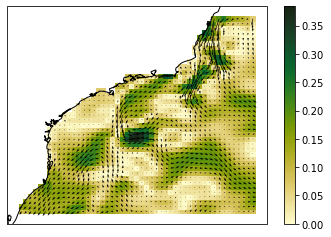

In [34]:
import cmocean as cmo

lon,lat = ds.longitude.values, ds.latitude.values
u,v = ds.isel(time=0, depth=0).u.values, ds.isel(time=0, depth=0).v.values

spd = np.sqrt(u**2, v**2)

fig,ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines('10m')

cp = ax.pcolormesh(lon, lat, spd, cmap=cmo.cm.speed)
ax.quiver(lon, lat, u, v)

plt.colorbar(cp)
plt.savefig('lec08_quiver_pcolormesh_cmocean.png', dpi=150, bbox_to_inches='tight')

**Nota**

- variáveis x,y,z devem ser do mesmo shape
- o mesmo para x,y,u,v no quiver
- customizações do gráfico sempre podem ser feitas utilizando o objetovo ```ax```

((49,), (41,), (41, 49), (41, 49))

# Exercícios práticos

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import griddata

sns.set_theme(style="darkgrid")
%matplotlib inline

----------------------

# 1) Conjunto de dados de espécies de peixes pelágicos em amostra de artigo

- leia o arquivo para um pandas.DataFrame e calcule:
    - qual a riqueza desta amostra? (número de espécies)
    - qual a abundância desta amostra? (número de indivíduos por espécie)
    
- com o pacote seaborn, elabore duas visualizações:
    - gráfico de barras
    - gráfico de pizza (pie)
    
**Tempo de execução**: 10min

**pacotes.métodos sugeridos**: 

- pandas.DataFrame.value_counts()
- pandas.DataFrame.plot(...)
- pandas.DataFrame.unique()

In [ ]:
# se estiver no google colab, rode:
!wget --directory-prefix=../dados/ https://github.com/nilodna/python-basico/raw/feature_iojr-shortcourse/dados/lista_de_especies.txt

In [53]:
# lendo arquivo
df = pd.read_csv('../dados/lista_de_especies.txt', header=None)
# renomeando coluna pra facilitar
df.columns = ['individuos']

# moldando dataframe para obter número de indivíduos por espécie
data = df['individuos'].value_counts(dropna=False).to_frame()

# riqueza: nro de espécies
print(f'A riqueza desta amostra é: {data.index.shape[0]}')
print(f'A abundância desta amostra é: \n')
print(data)

A riqueza desta amostra é: 7
A abundância desta amostra é: 

                         individuos
Trachinotus marginatus           88
Mugil platanus                   63
Mugil curema                     52
Menticirrhus littoralis          47
Mugil gaimardianus               33
Odonthestes bonariensis          27
Brevoortia pectinata             15


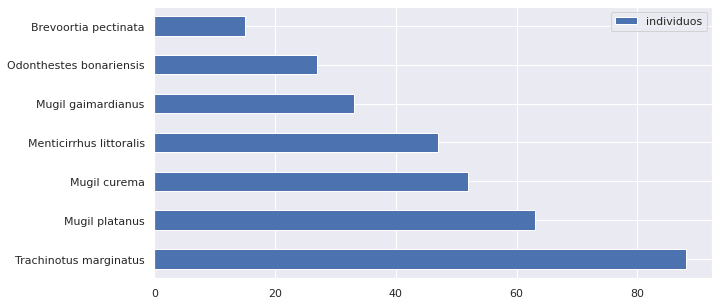

In [54]:
ax = data.plot(kind='barh', figsize=(10,5))

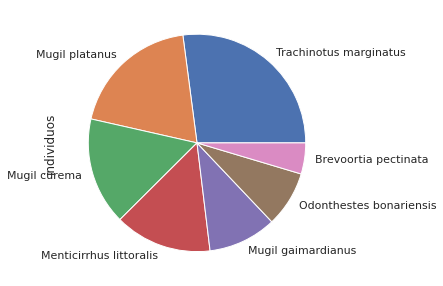

In [56]:
axes = data.plot(kind='pie', subplots=True, 
                 figsize=(10,5), 
                 legend=False)

# 2) Conjunto de dados de pesca de salmão


- um boxplot, para cada ano em subplot, do estágio de maturidade dos indivíduos (eixo x) com o peso molhado (eixo y)
    - monte uma função para extrair registros para cada ano:
    ```python
    def nome_funcao(df, year):
        ...
        return bla
```
    - monte um subplots com 4 eixos de imagem, um para cada ano, sendo 2 colunas e 2 linhas
    - customize ao seu estilo

- gráfico barras com peso molhado no eixo y, classificadods por sexo (grupos de colunas) e por maturidade (minigrupos de colunas)

**tempo de execução**: 20min

**pacotes.métodos sugeridos**: 

    - numpy.nan
    - pandas.DataFrame.mean
    - pandas.DataFrame.std
    - pandas.Series.str.lower
    - pandas.Series.str.upper
    - pandas.DataFrame.dropna
    - seaborn.boxplot
    - seaborn.catplot


In [63]:
# carregando dataset de salmão capturados no Pacífico Norte: https://www.bco-dmo.org/dataset/3106
fish = pd.read_csv('https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3106.csv',
                  dtype={'haul_id': int, 'weight_wet': float, 'length_wet': float, 'depth_w': float,
                         'sex': str, 'maturity': str, 'species_common_name': str},
                  skiprows=[1,2],
                  usecols=[0, 3, 9, 10, 12, 14, 15, 16])

In [64]:
# tratando o dataframe
# consertar string (tudo para lowercase)
fish['sex'] = fish['sex'].str.upper()
fish['maturity'] = fish['maturity'].str.upper()
fish['species_common_name'] = fish['species_common_name'].str.lower()


In [65]:
# controle de qualidade 

# funcao para remover valores fora do limite de 3 desvios padrão (desvio padrões?)
def controleQualidade(da):
    # calcula o limite superior e inferior
    limite_superior = da.mean() + 3*da.std()
    limite_inferior = da.mean() - 3*da.std()
    # com uma filtragem simples, atribui nan às linhas em que a condição é True
    da[da > limite_superior] = np.nan
    da[da < limite_inferior] = np.nan
    # retorna
    return da

# controle de qualidade
fish['length_wet'] = controleQualidade(fish['length_wet'].values)
fish['weight_wet'] = controleQualidade(fish['weight_wet'].values)

# remove linhas com NaN
fish = fish.dropna(how='any')

fish

,year,haul_id,depth_w,species_common_name,length_wet,weight_wet,sex,maturity
0,2001,2001001,64.0,chum,698.0,4108.0,M,A
126,2001,2001001,64.0,sockeye,589.0,2590.0,F,A
127,2001,2001001,64.0,sockeye,614.0,2950.0,F,A
241,2001,2001002,322.0,pink,487.0,1750.0,F,A
242,2001,2001002,322.0,pink,515.0,1360.0,F,A
...,...,...,...,...,...,...,...,...
26742,2004,2004025,4464.0,coho,331.0,411.0,M,J
26871,2004,2004029,36.0,chinook,760.0,5761.0,F,I
26872,2004,2004029,36.0,chinook,760.0,5761.0,F,I
26971,2004,2004029,36.0,coho,322.0,386.0,M,J


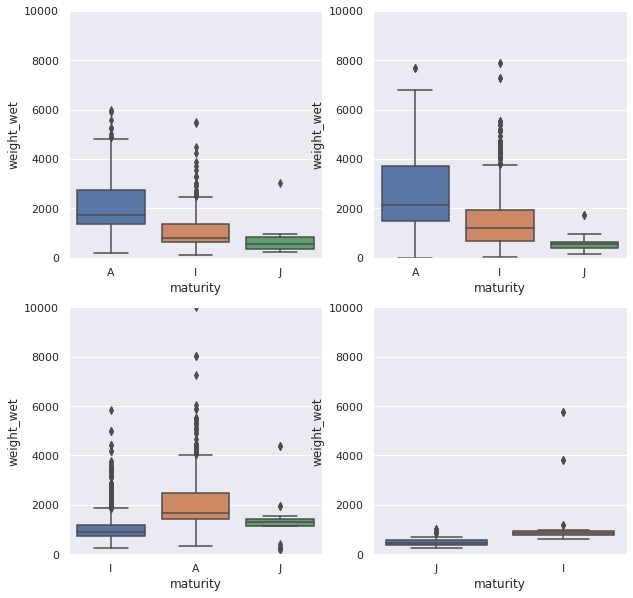

In [79]:
# 1o plot: boxplot
def extrair_por_ano(df, year):
    return df[df['year'] == year]

years = fish['year'].unique()

fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for year,ax in zip(years, axes.ravel()):
    # chamar a funcao
    df_tmp = extrair_por_ano(fish, year)

    ax = sns.boxplot(x='maturity', y='weight_wet', 
                     data=df_tmp, ax=ax)
    ax.set_ylim([0, 10000])

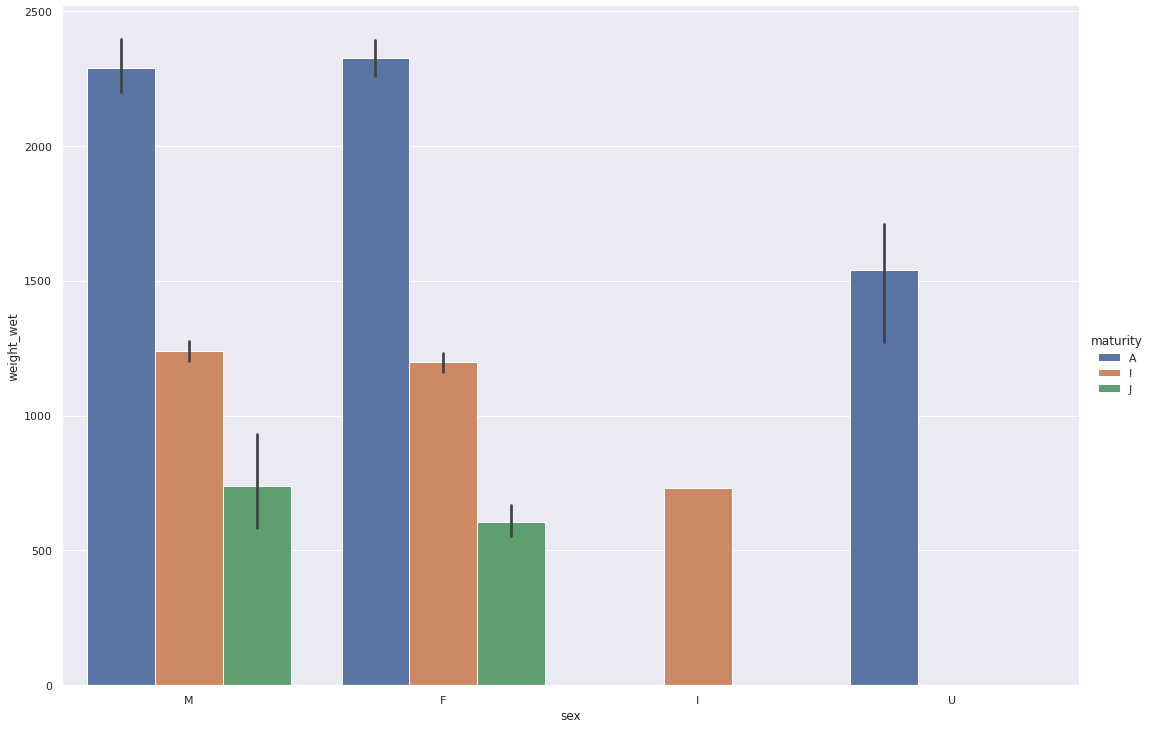

In [85]:
# 2o plot: catplot
sns.catplot(x='sex', y='weight_wet', 
            hue='maturity',
            data=fish, kind='bar',
            height=10, aspect=1.5)

# 3) interpolação de dados pontuais esparsos para grade regular

Supondo que acabamos de voltar do trabalho de campo, onde foi realizado o levantamento topográfico de uma praia. Precisamos agorar tratar estes dados, obtidos duramente em um dia quente. 

Com o conjunto, totalmente fictício, fornecido abaixo, utilize o pacote ```scipy.interpolate.griddata``` para interpolar os pontos espalhados para um campo 2D. Tente usar diversos métodos de interpolação, como ```linear``` ou ```cubic``` para avaliar o ganho de informação.

Se possível, adicione uma máscara fictícia e veja o que acontece.

Plote um gráfico com o campo interpolado em ```pcolormesh``` e os pontos aleatórios em ```scatter```.

**tempo de execução**: 20min

**pacotes.métodos utilizados**: 

    - numpy.nan
    - numpy.arange
    - numpy.meshgrid
    - numpy.random.random
    - scipy.interpolate.griddata
    - matplotlib.pyplot.pcolormesh
    - matplotlib.pyplot.scatter

In [86]:
# coordenadas e valores de forma randômica
x = np.random.random(100)
y = np.random.random(100)
z = np.random.random(100)

